In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# Save path to data set in a variable
# Use Pandas to read data
df = pd.read_csv("Data2.csv", index_col=0)
clean_pokedex = pd.read_csv("Data3.csv", index_col=0)

In [4]:
# Import colors tied to the Pokemon games
Pokemon_colors=sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9)

In [5]:
# Remove Eternatus due to lack of data
df=df.drop(index=890)

In [6]:
stats_df=df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]]
stats_and_type_df=df[["name", "type_1", "type_2", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]]

Text(0.5, 0, 'Weight')

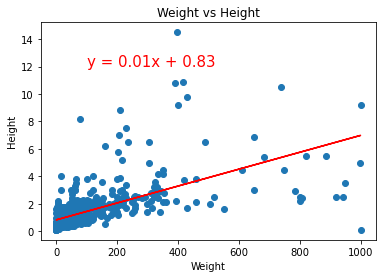

In [7]:
# We graphed the weight vs height
x_val=df["weight_kg"]
y_val=df["height_m"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.title("Weight vs Height")
plt.annotate(line_eq,(100,12),fontsize=15,color="red")
plt.ylabel("Height")
plt.xlabel("Weight")

<AxesSubplot:title={'center':'How are the Attributes distributed?'}>

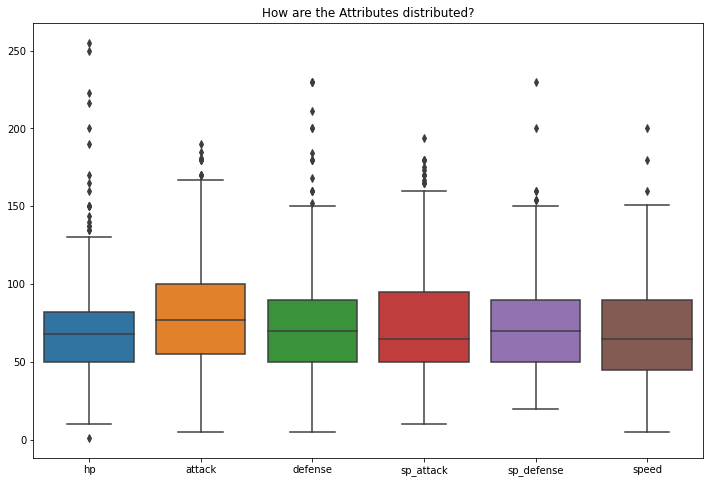

In [8]:
# We created box plots for each of the attributes
plt.figure(figsize=(12,8))
plt.title("How are the Attributes distributed?")
sns.boxplot(data=stats_df)

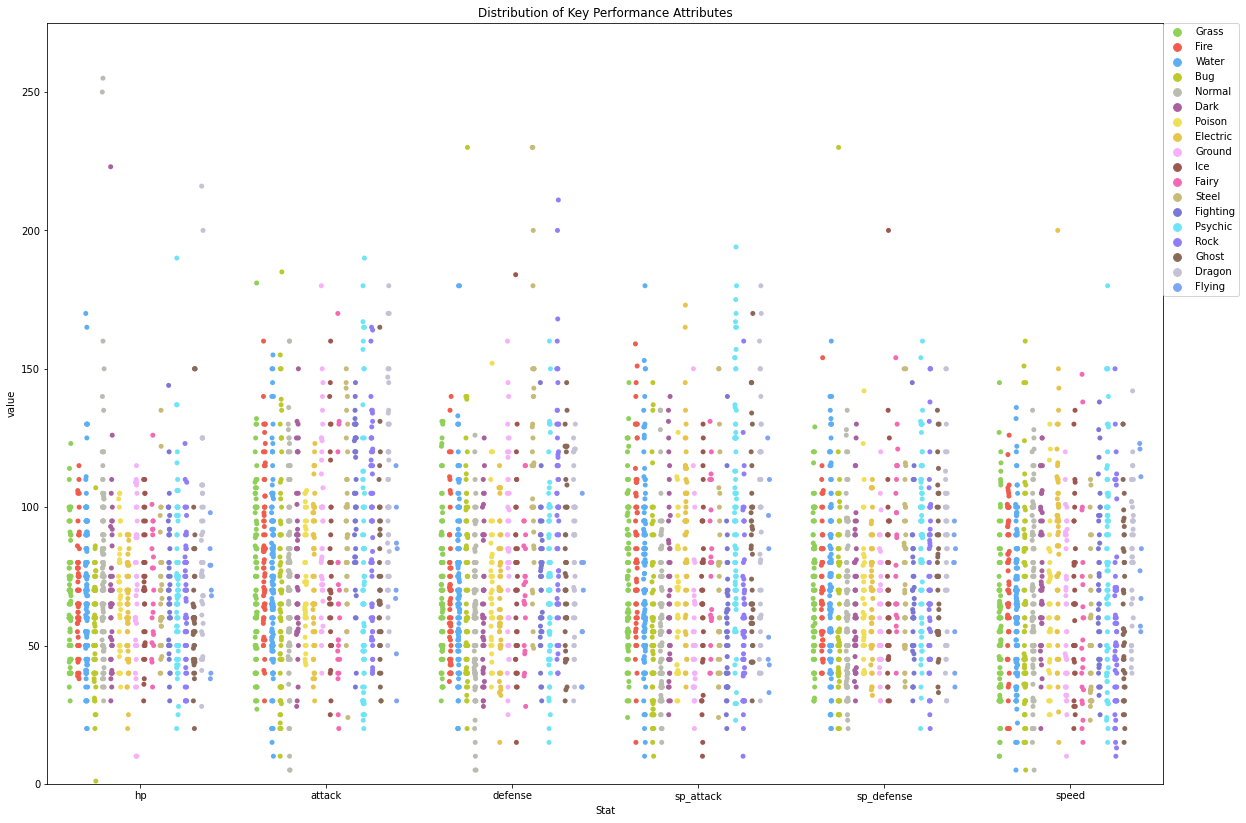

In [9]:
# We wanted to look at the Pokemon types compared to the attribute values. We decieded to use a graphing system that plotted scatter points
# because of how spread out the Pokemon are we felt that other graphs hid the individuality of the Pokemon

stats_and_type_df = pd.melt(stats_and_type_df, id_vars=["name", "type_1", "type_2"], var_name="Stat")

with sns.color_palette([
   "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
   "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
   "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
   "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(20,14))
    plt.ylim(0, 275)
    sns.stripplot(x="Stat", y="value", data=stats_and_type_df, hue="type_1", dodge=True)
    plt.title("Distribution of Key Performance Attributes")
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

Text(0, 0.5, '')

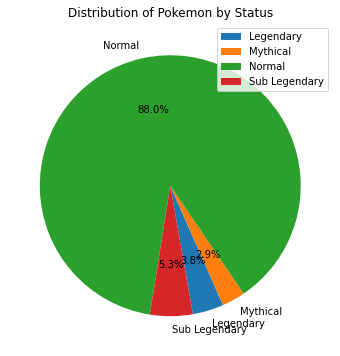

In [10]:
Pie_chart=df.groupby(['status']).count()

Pie_chart.plot(kind="pie", y='name', title="Distribution of Pokemon by Status", startangle=280, figsize=(12,6), autopct = "%1.1f%%")
plt. ylabel("")

Text(0, 0.5, 'Number of Pokemon')

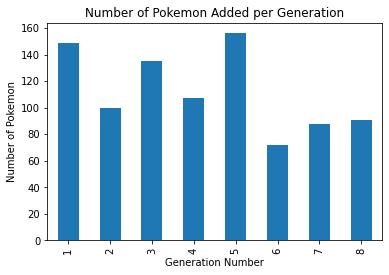

In [11]:
Bar_chart=clean_pokedex.groupby(['generation']).nunique()["name"]
Bar_chart=Bar_chart.plot.bar(rot='vertical',title='Number of Pokemon Added per Generation')
Bar_chart.set_xlabel("Generation Number")
Bar_chart.set_ylabel("Number of Pokemon") 

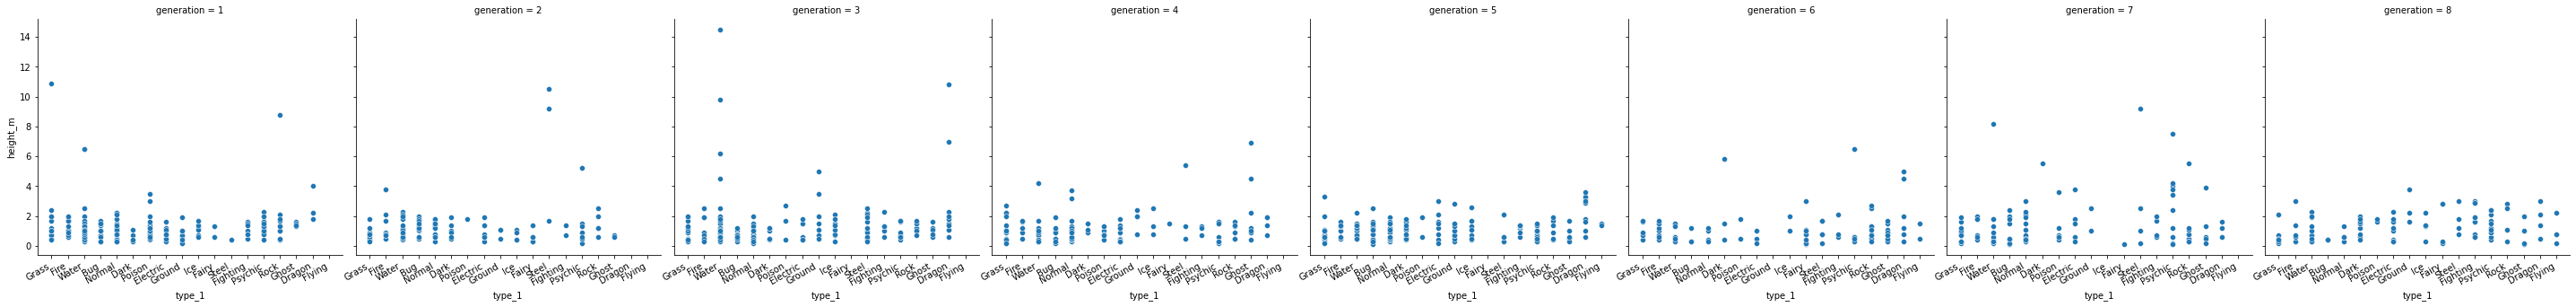

In [12]:
gens_height=sns.relplot(data=df, x="type_1", y="height_m", col="generation",
    palette=["b", "r"], sizes=(40, 60))
gens_height.figure.autofmt_xdate()

In [13]:
def comp(Type,Attribute):
    fig, ax = plt.subplots(2,1)
    fig.set_size_inches(17,12)
    sns.swarmplot(x=Type,y=Attribute,ax=ax[0],data=df, palette=Pokemon_colors, size=3)
    sns.barplot(x=Type,y=Attribute,ax=ax[1],data=df, palette=Pokemon_colors)

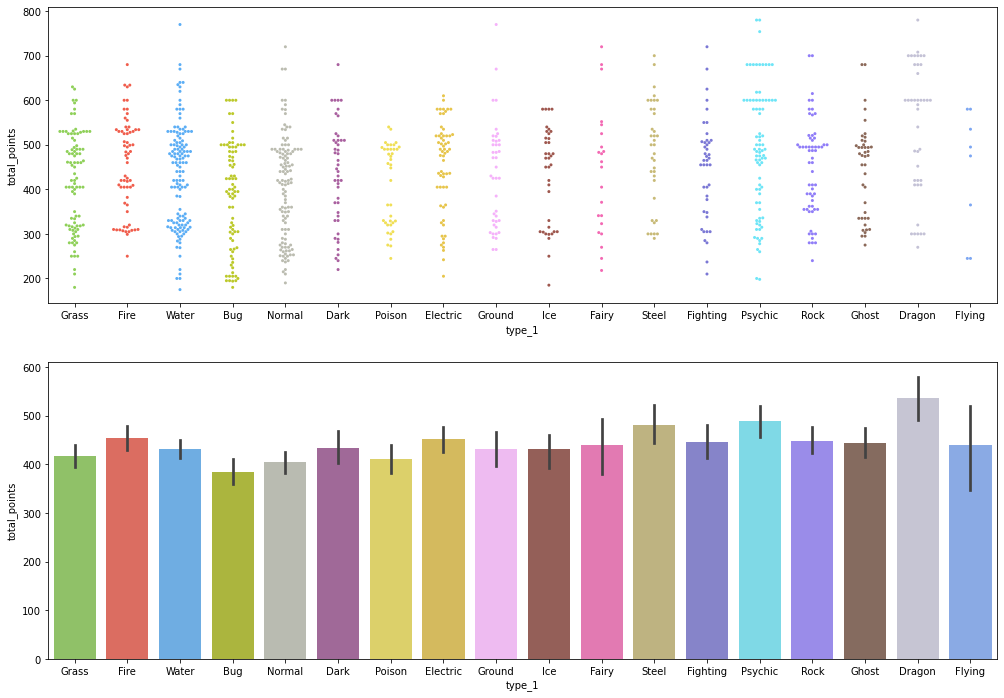

In [14]:
#Let's start with Type 1 and Attack
comp('type_1','total_points')

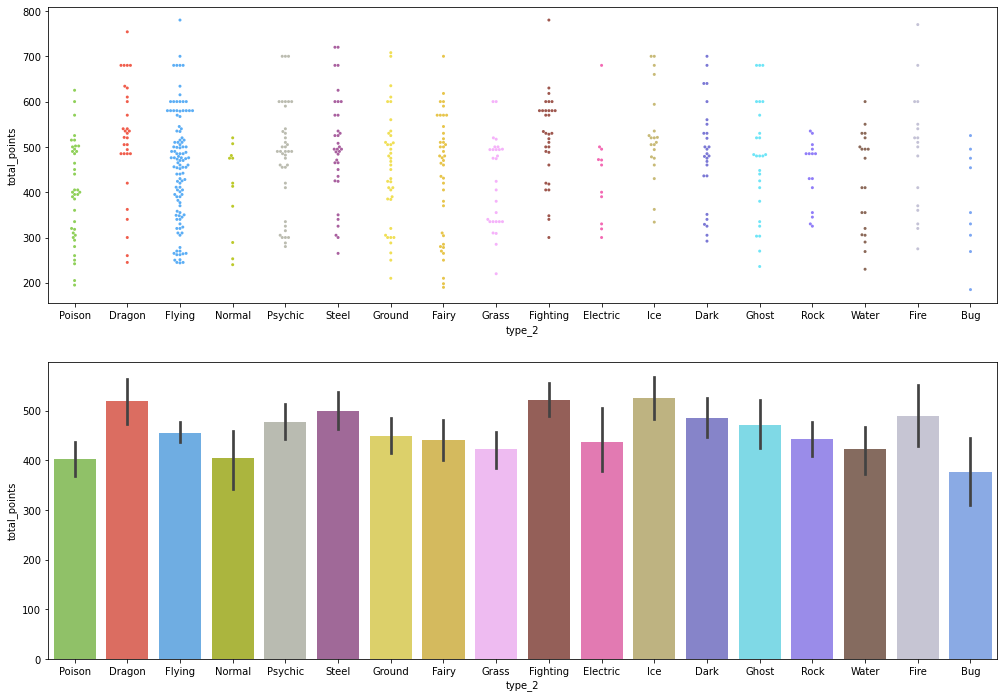

In [15]:
#Let's start with Type 2 and Attack 
comp('type_2','total_points')